In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


2024-12-12 17:17:53.688149: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../data_cleaned/train_data_cleaned.csv')
df['sentiment'] = df['sentiment'].astype(int)

X = df['tweet'].values
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

y_train += 1

X_train = pd.Series(X_train).fillna('').astype(str)
X_test = pd.Series(X_test).fillna('').astype(str)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1  
max_length = max(len(x.split()) for x in X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding='post')

In [3]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(3, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(
    X_train_seq, y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/25
141/141 - 12s - 85ms/step - accuracy: 0.4546 - loss: 3.7637 - val_accuracy: 0.5125 - val_loss: 1.7138
Epoch 2/25
141/141 - 8s - 54ms/step - accuracy: 0.5421 - loss: 1.1979 - val_accuracy: 0.5355 - val_loss: 1.0267
Epoch 3/25
141/141 - 8s - 54ms/step - accuracy: 0.6223 - loss: 0.8586 - val_accuracy: 0.5275 - val_loss: 0.9951
Epoch 4/25
141/141 - 8s - 54ms/step - accuracy: 0.6767 - loss: 0.7486 - val_accuracy: 0.5315 - val_loss: 1.0373
Epoch 5/25
141/141 - 7s - 52ms/step - accuracy: 0.7359 - loss: 0.6579 - val_accuracy: 0.5495 - val_loss: 1.1640
Epoch 6/25
141/141 - 7s - 52ms/step - accuracy: 0.8049 - loss: 0.5457 - val_accuracy: 0.5445 - val_loss: 1.1578
Epoch 7/25
141/141 - 7s - 52ms/step - accuracy: 0.8431 - loss: 0.4745 - val_accuracy: 0.5544 - val_loss: 1.1882
Epoch 8/25
141/141 - 7s - 52ms/step - accuracy: 0.8820 - loss: 0.3930 - val_accuracy: 0.5415 - val_loss: 1.3552
Epoch 9/25
141/141 - 7s - 53ms/step - accuracy: 0.9008 - loss: 0.3459 - val_accuracy: 0.5375 - val_loss

<Figure size 1200x600 with 0 Axes>

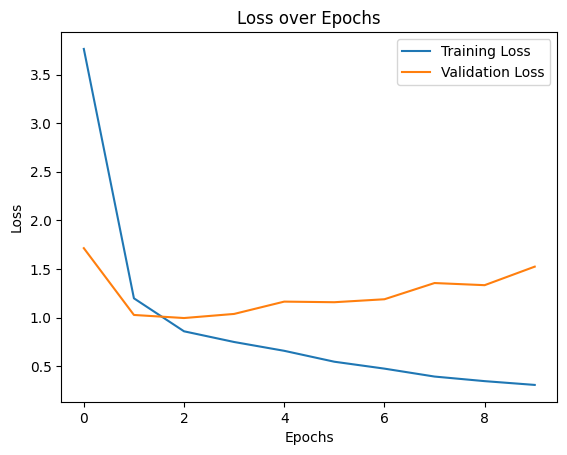

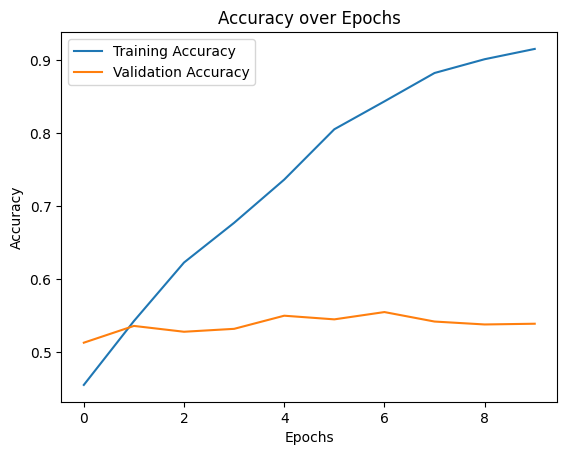

In [5]:
plt.figure(figsize=(12, 6))

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
test_loss, test_accuracy = model.evaluate(X_test_seq, y_test + 1, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

35/35 - 0s - 11ms/step - accuracy: 0.5576 - loss: 0.9559
Test Accuracy: 0.5576
